<a href="https://colab.research.google.com/github/DrKamaleshR/Supervised-ML-regression/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

For any business growth it is very important to know it's future business and take steps accordingly to improve or grow their business.

Here we have Rossmann various stores and we are to predict sales for different stores.

Let's start by exploring data set, which are the factors affecting Sales in this stores.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ross_dfpath='/content/drive/My Drive/almabetter projects/SUPERVISED re/Rossmann Stores Data.csv'

In [4]:
rosstorepath='/content/drive/My Drive/almabetter projects/SUPERVISED re/store.csv'

In [5]:
ross_df=pd.read_csv(ross_dfpath)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Exploratory Data Analysis



In [6]:
ross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
ross_df.shape

(1017209, 9)

In [8]:
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
store_df=pd.read_csv(rosstorepath)


In [10]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
store_df.shape

(1115, 10)

In [12]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
'''CHECKING FOR NaN values'''

'CHECKING FOR NaN values'

In [14]:
ross_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

No NaN caluses are present in ross_df.csv

In [15]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Numerous Nan values are seen in - 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'. However, 'CompetitionDistance 'has only 3 null values. Data cleaning is needed.


In [16]:
#creating copy
store_dfv2 = store_df.copy()

In [17]:
## Replacing Nan values with 0.

In [18]:
store_dfv2['CompetitionOpenSinceMonth'] = store_dfv2['CompetitionOpenSinceMonth'].fillna(0)
store_dfv2['CompetitionOpenSinceYear'] = store_dfv2['CompetitionOpenSinceYear'].fillna(0)
store_dfv2['Promo2SinceWeek'] = store_dfv2['Promo2SinceWeek'].fillna(0)
store_dfv2['Promo2SinceYear'] = store_dfv2['Promo2SinceYear'].fillna(0)
store_dfv2['PromoInterval'] = store_dfv2['PromoInterval'].fillna(0)

In [19]:
#Rechecking NaN values
store_dfv2.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [20]:
ROSS = pd.merge(ross_df, store_dfv2, on='Store', how='left')
ROSS.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [21]:
ROSS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [22]:
#lets find out data range of the data
print(ROSS['Date'].min(),'- start')
print(ROSS['Date'].max(), '- end')

2013-01-01 - start
2015-07-31 - end


In [23]:
ROSS.head(1115)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,5,2015-07-31,5723,422,1,1,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,5,2015-07-31,9626,767,1,1,0,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,5,2015-07-31,7289,720,1,1,0,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,5,2015-07-31,27508,3745,1,1,0,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


We have 31 months retail sales data  in the datasheet.


In [24]:
ROSS.tail(1114)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1016095,1,2,2013-01-01,0,0,0,0,a,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1016096,2,2,2013-01-01,0,0,0,0,a,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1016097,3,2,2013-01-01,0,0,0,0,a,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1016098,4,2,2013-01-01,0,0,0,0,a,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
1016099,5,2,2013-01-01,0,0,0,0,a,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


Sales is key variable, lets check if it has negative values or 0.

In [25]:
ROSS[ROSS['Sales'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
291,292,5,2015-07-31,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
875,876,5,2015-07-31,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
1406,292,4,2015-07-30,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
1990,876,4,2015-07-30,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
2521,292,3,2015-07-29,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [26]:
# Checking if false sale values are present in closed stores
ROSS[(ROSS['Open'] == 1) & (ROSS['Sales'] == 0)]


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
86825,971,5,2015-05-15,0,0,1,0,0,1,c,a,1140.0,5.0,2011.0,1,14.0,2012.0,"Mar,Jun,Sept,Dec"
142278,674,4,2015-03-26,0,0,1,0,0,0,a,a,2640.0,12.0,2005.0,1,31.0,2013.0,"Feb,May,Aug,Nov"
196938,699,4,2015-02-05,0,0,1,1,0,0,a,a,180.0,0.0,0.0,1,5.0,2013.0,"Jan,Apr,Jul,Oct"
322053,708,3,2014-10-01,0,0,1,1,0,0,c,c,11470.0,10.0,2009.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct"
330176,357,1,2014-09-22,0,0,1,0,0,0,a,a,2060.0,10.0,2008.0,0,0.0,0.0,0
340348,227,4,2014-09-11,0,0,1,0,0,0,a,a,2370.0,0.0,0.0,0,0.0,0.0,0
340860,835,4,2014-09-11,0,0,1,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
341795,835,3,2014-09-10,0,0,1,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
346232,548,5,2014-09-05,0,0,1,1,0,1,d,c,3760.0,2.0,2009.0,0,0.0,0.0,0
346734,28,4,2014-09-04,0,0,1,1,0,0,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec"


We can see that all closed stores have 0 sales values.


In [27]:
# Lets find out the number of closed stored and store sales 0 to remove them as they serves minimal to no purpose
ROSS2=ROSS[(ROSS['Open']==1)]
ROSS2.drop(['Open'],axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
ROSS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Promo                      844392 non-null  int64  
 6   StateHoliday               844392 non-null  object 
 7   SchoolHoliday              844392 non-null  int64  
 8   StoreType                  844392 non-null  object 
 9   Assortment                 844392 non-null  object 
 10  CompetitionDistance        842206 non-null  float64
 11  CompetitionOpenSinceMonth  844392 non-null  float64
 12  CompetitionOpenSinceYear   844392 non-null  float64
 13  Promo2                     8

In [29]:
ROSS2.shape

(844392, 17)

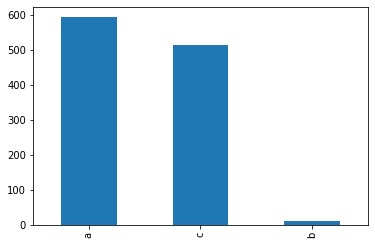

In [30]:
#categorical data visualisation
store_df['Assortment'].value_counts().plot(kind='bar')

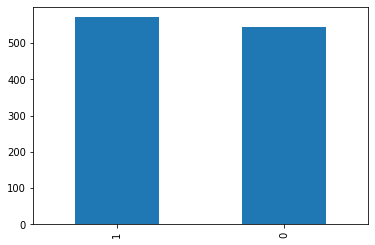

In [31]:
store_df['Promo2'].value_counts().plot(kind='bar')

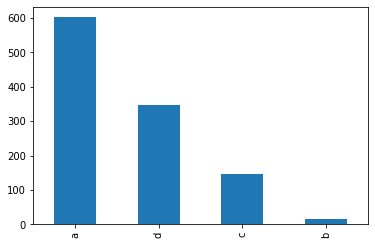

In [32]:

store_df['StoreType'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


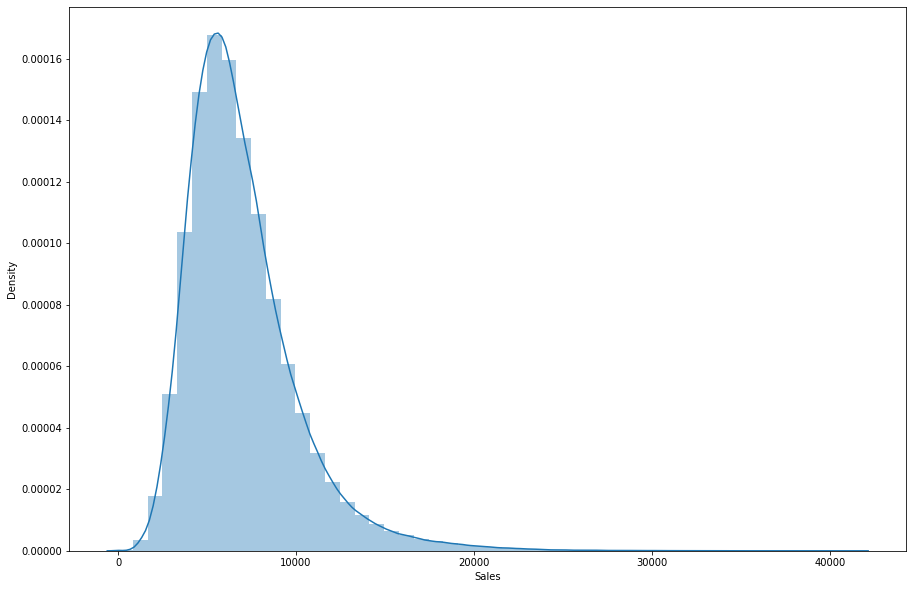

In [33]:
#continous data visualisation
plt.figure(figsize=(15,10))
sns.distplot(ROSS2['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


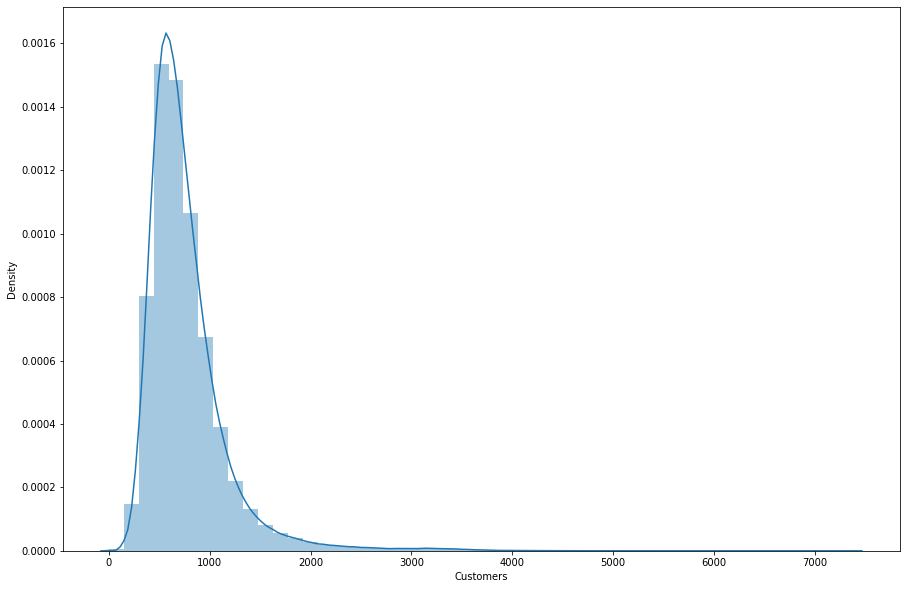

In [34]:
plt.figure(figsize=(15,10))
sns.distplot(ROSS2['Customers'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


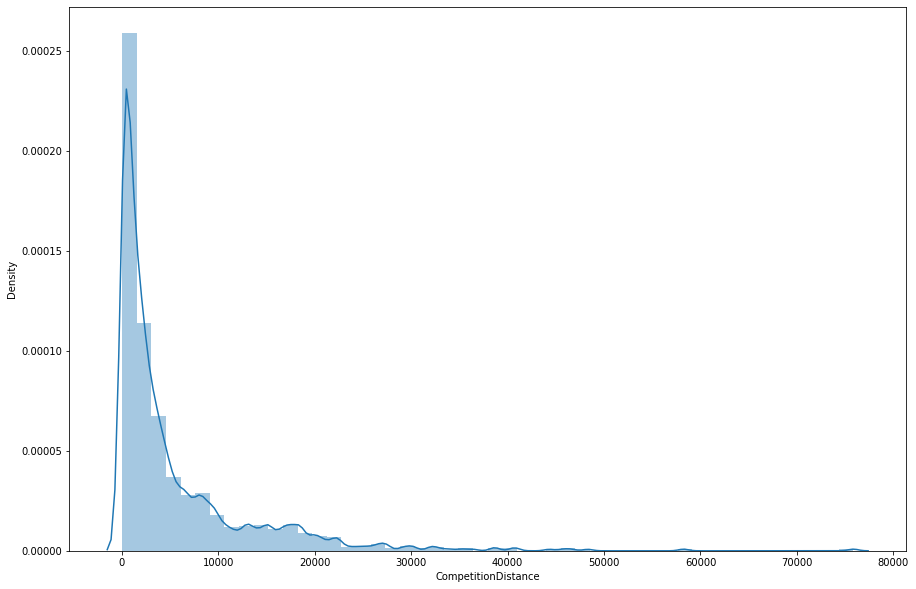

In [35]:
plt.figure(figsize=(15,10))
sns.distplot(ROSS2['CompetitionDistance'])

In [36]:
# Sales vs Other variables/features

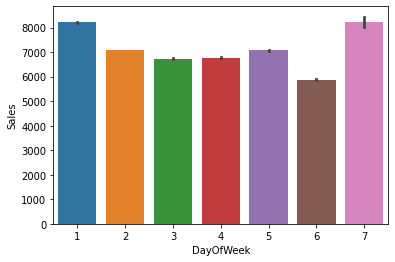

In [37]:
sns.barplot(x="DayOfWeek", y="Sales", data=ROSS2)
plt.show()

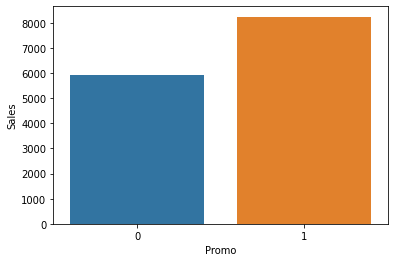

In [38]:
sns.barplot(x="Promo", y="Sales", data=ROSS2)
plt.show()

In [39]:
ROSS2.loc[ROSS2['StateHoliday'] == '0', 'StateHoliday'] = 0
ROSS2.loc[ROSS2['StateHoliday'] == 'a', 'StateHoliday'] = 1
ROSS2.loc[ROSS2['StateHoliday'] == 'b', 'StateHoliday'] = 2
ROSS2.loc[ROSS2['StateHoliday'] == 'c', 'StateHoliday'] = 3
ROSS2['StateHoliday'] = ROSS2['StateHoliday'].astype(int, copy=False)

print('levels :', ROSS2['StateHoliday'].unique(), '; data type :', ROSS2['StateHoliday'].dtype)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


levels : [0 1 2 3] ; data type : int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


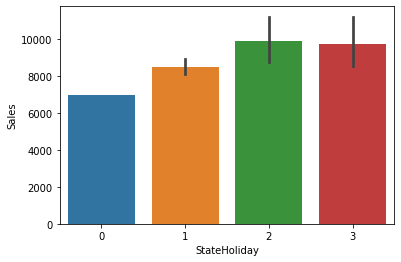

In [40]:
sns.barplot(x="StateHoliday", y="Sales", data=ROSS2)


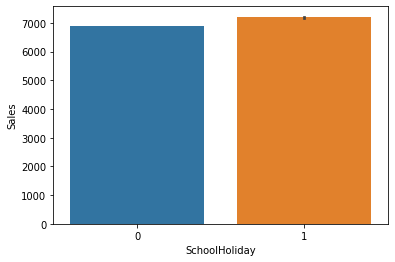

In [41]:
sns.barplot(x="SchoolHoliday", y="Sales", data=ROSS2)


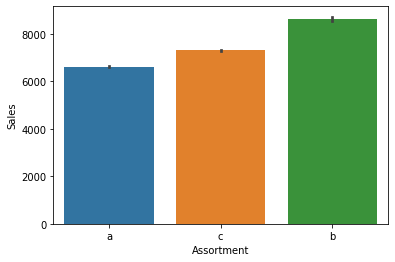

In [42]:
sns.barplot(x="Assortment", y="Sales", data=ROSS2)

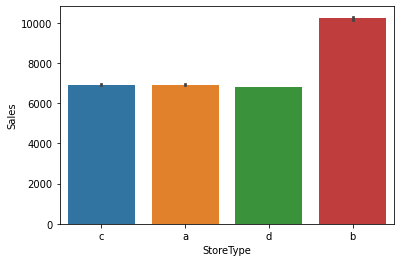

In [43]:
sns.barplot(x="StoreType", y="Sales", data=ROSS2)

In [44]:
print(ROSS2[ROSS2['StoreType'] == 'a']['Sales'].mean())
print(ROSS2[ROSS2['StoreType'] == 'b']['Sales'].mean())
print(ROSS2[ROSS2['StoreType'] == 'c']['Sales'].mean())
print(ROSS2[ROSS2['StoreType'] == 'd']['Sales'].mean())

6925.167661028667
10231.40750497976
6932.512754695605
6822.1418805598705


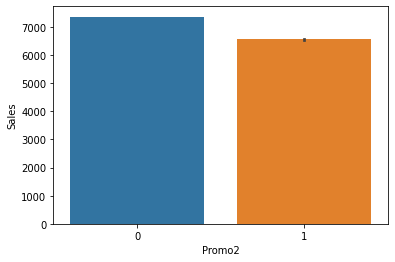

In [45]:
sns.barplot(x="Promo2", y="Sales", data=ROSS2)
plt.show()

[link text](https://)

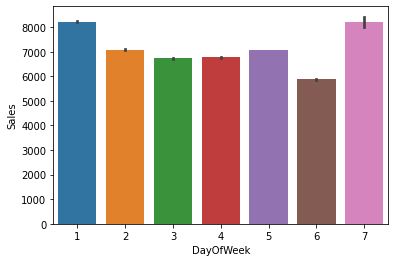

In [46]:
sns.barplot(x="DayOfWeek", y="Sales", data=ROSS2)

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

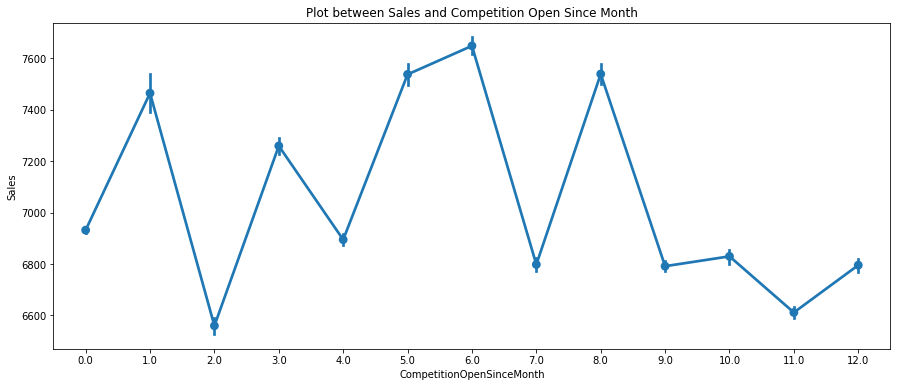

In [47]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=ROSS2)
plt.title('Plot between Sales and Competition Open Since Month')

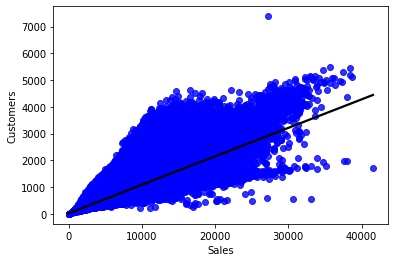

In [48]:
#Sales vs No of customers Correlation
sns.regplot(x=ROSS2['Sales'], y=ROSS2['Customers'],scatter_kws={"color": "blue"}, line_kws={"color": "black"})

In [49]:
ROSS2['Customers'].corr(ROSS2['Sales'])

0.8235967321975434

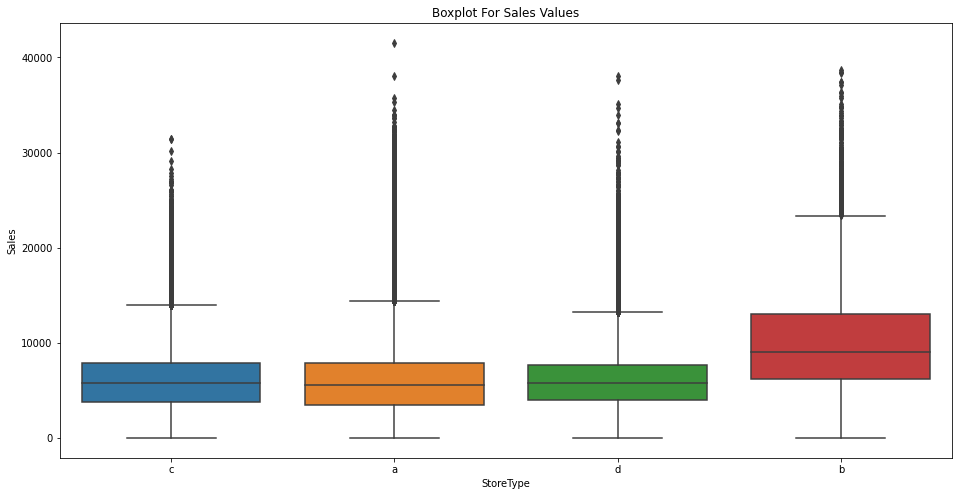

In [50]:
plt.figure(figsize=(16, 8))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=ROSS)
plt.title('Boxplot For Sales Values')
plt.show()

FEATURE PREDICTION MODEL.


In [51]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [55]:
ROSS3= pd.get_dummies(ROSS2,columns=['PromoInterval','DayOfWeek','StateHoliday','StoreType','Assortment'])

Model 1

In [56]:
# define dependent variable
DV = 'Sales'

# defining independent variable
IV = list(ROSS3.columns.drop(['Promo2SinceYear','Date','Sales']))

In [57]:
IV


['Store',
 'Customers',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StateHoliday_0',
 'StateHoliday_1',
 'StateHoliday_2',
 'StateHoliday_3',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [58]:
# Creation of independent variables
x = ROSS3[IV].values

# Creation of dependent variable
y = ROSS3[DV].values

In [60]:
# splitting train & test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(591074, 31)
(253318, 31)


**Linear Regression**

In [61]:
reg = LinearRegression().fit(x_train, y_train)

ValueError: ignored